In [22]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [1]:


# Load the Shopee sample dataset
file_path = "20240121_shopee_sample_data.csv"
df = pd.read_csv(file_path)


In [2]:
# quick overview
print(df.shape)
print(df.columns)
df.head()

(20312, 20)
Index(['price_ori', 'delivery', 'item_category_detail', 'specification',
       'title', 'w_date', 'link_ori', 'item_rating', 'seller_name',
       'idElastic', 'price_actual', 'sitename', 'idHash', 'total_rating', 'id',
       'total_sold', 'pict_link', 'favorite', 'timestamp', 'desc'],
      dtype='object')


,price_ori,delivery,item_category_detail,specification,title,w_date,link_ori,item_rating,seller_name,idElastic,price_actual,sitename,idHash,total_rating,id,total_sold,pict_link,favorite,timestamp,desc
0,25.80,"KL City, Kuala Lumpur",Shopee | Women's Bags | Shoulder Bags | Should...,Product Specifications Category Shopee Women's...,1081 PU SLING BAG KULIT leather Casual Beg Tan...,2023-04-27,https://shopee.com.my/1081-PU-SLING-BAG-KULIT-...,4.9,qqfwholesale,19ec9fdedd9fe3e14bc652950fc3c423,12.90,shopee,88f051f0a2dcf0d29191e0175b828938,179,88f051f0a2dcf0d29191e0175b828938,179,https://down-my.img.susercontent.com/file/my-1...,Favorite (128,1682553600000,🎉 WELCOME To QQF WHOLESALE \r\n😍 ALL item read...
1,1.41,NaN,Shopee | Home Appliances | Sewing Machines | S...,Product Specifications Category Shopee Home Ap...,Stat Chinese Traditional Frog Buttons Knot Che...,2023-04-27,https://shopee.com.my/Stat-Chinese-Traditional...,5.0,stationery.my,5322309be3b6d9c01d15fa19f5b7ad9a,0.75,shopee,472d22f58af3bb35cf28c6eed7088dc5,17,472d22f58af3bb35cf28c6eed7088dc5,17,https://down-my.img.susercontent.com/file/4147...,Favorite (19,1682553600000,Chinese Traditional Frog Buttons Knot Cheongsa...
2,8.50,"KL City, Kuala Lumpur",Shopee | Women's Bags | Handbags | Set Handbags,Product Specifications Category Shopee Women's...,N09 READY STOCK MYFOOYIN woman handbag set 2in...,2023-04-26,https://shopee.com.my/N09-READY-STOCK-MYFOOYIN...,4.9,fooyin88,7a36765d1e2ca2b6a5414ddfeedfefc3,8.50,shopee,ec6ce64f4b77efb38b6392818959f181,8.1k,ec6ce64f4b77efb38b6392818959f181,8.1k,https://down-my.img.susercontent.com/file/23da...,Favorite (21.5k,1682467200000,READY STOCK\nMEASUREMENT:\nLONG 26CM X HEIGHT ...
3,8.70,NaN,Shopee | Women Clothes | Maternity Wear | Inne...,Product Specifications Category Shopee Women C...,🔥Shocking Sale🔥Cotton Comfort Nursing Bra Brea...,2023-04-26,https://shopee.com.my/%F0%9F%94%A5Shocking-Sal...,4.9,vivi2002,7fc4ab69722e4f788f217b4c044f83eb,8.70,shopee,ef4e0e17fdc7d0125d8609dcc395bc3d,6.5k,ef4e0e17fdc7d0125d8609dcc395bc3d,6.5k,https://down-my.img.susercontent.com/file/df47...,Favorite (3.4k,1682467200000,PRODUCT DESCRIPTION\nMaterial:95%Cotton+5%Span...
4,3999.00,"KL City, Kuala Lumpur",Shopee | Cameras & Drones | DSLR Cameras | DSLRs,Product Specifications Category Shopee Cameras...,Canon EOS 70D 18-55mm IS STM Original+64gb+ext...,2023-04-26,https://shopee.com.my/Canon-EOS-70D-18-55mm-IS...,5.0,xpro.gadget,55608f901f4c5384f884de18227d4298,2739.00,shopee,568c2029fed7d22973ff96d0404a8ff8,10,568c2029fed7d22973ff96d0404a8ff8,10,https://down-my.img.susercontent.com/file/4d3a...,Favorite (132,1682467200000,Canon 70D\nHighlights\nEF-S 18-55mm f/3.5-5.6 ...


In [3]:
### checking for data quality

# missing values
print(df.isnull().sum())

# data types
print(df.dtypes)

price_ori                 200
delivery                13754
item_category_detail        0
specification              11
title                       0
w_date                      0
link_ori                    0
item_rating                11
seller_name                11
idElastic                   0
price_actual               15
sitename                    0
idHash                      0
total_rating               11
id                          0
total_sold                 11
pict_link                   0
favorite                 1070
timestamp                   0
desc                        0
dtype: int64
price_ori               float64
delivery                 object
item_category_detail     object
specification            object
title                    object
w_date                   object
link_ori                 object
item_rating              object
seller_name              object
idElastic                object
price_actual            float64
sitename                 object
idH

In [8]:
# Converting w_date to datetime and filter only listings from May 2023
df['w_date'] = pd.to_datetime(df['w_date'], errors='coerce')
df_may = df[df['w_date'].dt.month == 5]


In [9]:
# cleaning and converting total_sold to numeric (handling 'k', 'K', and commas)
def clean_total_sold(val):
    if pd.isna(val):
        return 0
    val = str(val).lower().replace(',', '').strip()
    if 'k' in val:
        try:
            return float(val.replace('k', '')) * 1000
        except:
            return 0
    try:
        return float(val)
    except:
        return 0

df_may['total_sold_clean'] = df_may['total_sold'].apply(clean_total_sold)


/var/folders/4g/vkqm1p4n6y5bc3s9rn00dt_m0000gn/T/ipykernel_63653/3069280928.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_may['total_sold_clean'] = df_may['total_sold'].apply(clean_total_sold)


In [10]:
# calculating the total revenue = price_actual * total_sold
df_may['revenue'] = df_may['price_actual'] * df_may['total_sold_clean']


/var/folders/4g/vkqm1p4n6y5bc3s9rn00dt_m0000gn/T/ipykernel_63653/998996067.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_may['revenue'] = df_may['price_actual'] * df_may['total_sold_clean']


In [11]:
# extracting main category from item_category_detail
def extract_main_category(val):
    try:
        return val.split('|')[1].strip()
    except:
        return 'Unknown'

df_may['main_category'] = df_may['item_category_detail'].apply(extract_main_category)


/var/folders/4g/vkqm1p4n6y5bc3s9rn00dt_m0000gn/T/ipykernel_63653/1165097400.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_may['main_category'] = df_may['item_category_detail'].apply(extract_main_category)


In [12]:
# aAggregating revenue by main category
revenue_by_category = df_may.groupby('main_category')['revenue'].sum().sort_values(ascending=False)

# Displaying top 10 categories by revenue
revenue_by_category.head(10)

main_category
Home Appliances           2.147649e+08
Health & Beauty           1.745886e+08
Mobile & Accessories      1.309880e+08
Baby & Toys               1.296798e+08
Groceries & Pets          8.763406e+07
Home & Living             7.916189e+07
Men Clothes               3.809856e+07
Sports & Outdoor          3.128904e+07
Automotive                3.029399e+07
Computer & Accessories    2.922741e+07
Name: revenue, dtype: float64

### | Rank | Main Category              | Estimated Revenue (MYR) |

- | ---- | -------------------------- | ----------------------- |
- | 1    | **Home Appliances**        | \~214.8 million         |
- | 2    | **Health & Beauty**        | \~174.6 million         |
- | 3    | **Mobile & Accessories**   | \~130.9 million         |
- | 4    | **Baby & Toys**            | \~129.7 million         |
- | 5    | **Groceries & Pets**       | \~87.6 million          |
- | 6    | **Home & Living**          | \~79.2 million          |
- | 7    | **Men Clothes**            | \~38.1 million          |
- | 8    | **Sports & Outdoor**       | \~31.3 million          |
- | 9    | **Automotive**             | \~30.3 million          |
- | 10   | **Computer & Accessories** | \~29.2 million          |


In [13]:
#  Number of Products Crawled Per Day
products_per_day = df_may['w_date'].value_counts().sort_index()

In [14]:
# Number of Listings by Location from `specification` column
malaysia_states = [
    'Johor', 'Kedah', 'Kelantan', 'Melaka', 'Negeri Sembilan', 'Pahang',
    'Penang', 'Perak', 'Perlis', 'Sabah', 'Sarawak', 'Selangor', 'Terengganu',
    'Kuala Lumpur', 'Labuan', 'Putrajaya'
]

In [15]:
def extract_location(spec):
    if pd.isna(spec):
        return 'Unknown'
    for state in malaysia_states:
        if state.lower() in spec.lower():
            return state
    return 'Oversea'

df_may['location'] = df_may['specification'].apply(extract_location)
location_counts = df_may['location'].value_counts()


/var/folders/4g/vkqm1p4n6y5bc3s9rn00dt_m0000gn/T/ipykernel_63653/2985306159.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_may['location'] = df_may['specification'].apply(extract_location)


In [16]:
#  Category Breakdown
def extract_category_components(val, idx):
    try:
        return val.split('|')[idx].strip()
    except:
        return 'Unknown'

df_may['main_category'] = df_may['item_category_detail'].apply(lambda x: extract_category_components(x, 1))
df_may['subcat_1'] = df_may['item_category_detail'].apply(lambda x: extract_category_components(x, 2))
df_may['subcat_2'] = df_may['item_category_detail'].apply(lambda x: extract_category_components(x, 3))


/var/folders/4g/vkqm1p4n6y5bc3s9rn00dt_m0000gn/T/ipykernel_63653/2891042717.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_may['main_category'] = df_may['item_category_detail'].apply(lambda x: extract_category_components(x, 1))
/var/folders/4g/vkqm1p4n6y5bc3s9rn00dt_m0000gn/T/ipykernel_63653/2891042717.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_may['subcat_1'] = df_may['item_category_detail'].apply(lambda x: extract_category_components(x, 2))
/var/folders/4g/vkqm1p4n6y5bc3s9rn00dt_m0000g

In [17]:
# Number of listing products per main category
main_category_counts = df_may['main_category'].value_counts()


In [18]:
# for top 3 main categories, top 5 subcategory 1 by count
top3_main = main_category_counts.head(3).index
top5_subcat_by_main = {
    cat: df_may[df_may['main_category'] == cat]['subcat_1'].value_counts().head(5)
    for cat in top3_main
}


In [19]:
# Price Range per Main Category
price_range_by_category = df_may.groupby('main_category')['price_actual'].agg(['min', 'max', 'mean'])


In [20]:
# Revenue per Main Category (already done above)
revenue_by_category = df_may.groupby('main_category')['revenue'].sum().sort_values(ascending=False)


In [21]:
# Return a summary of results
{
    "Products Per Day (May 2023)": products_per_day.head(),
    "Listings by Location": location_counts.head(),
    "Main Category Counts": main_category_counts.head(),
    "Top 5 Subcategories by Top 3 Main Categories": {k: v.to_dict() for k, v in top5_subcat_by_main.items()},
    "Price Range by Main Category": price_range_by_category.head(),
    "Revenue by Main Category": revenue_by_category.head()
}

{'Products Per Day (May 2023)': 2023-05-01    3646
 2023-05-02     466
 2023-05-03     985
 2023-05-04     201
 2023-05-05     852
 Name: w_date, dtype: int64,
 'Listings by Location': Selangor        5856
 Oversea         2661
 Kuala Lumpur    2418
 Johor           1228
 Perak           1137
 Name: location, dtype: int64,
 'Main Category Counts': Men Clothes             1963
 Health & Beauty         1931
 Women Clothes           1729
 Mobile & Accessories    1476
 Baby & Toys             1322
 Name: main_category, dtype: int64,
 'Top 5 Subcategories by Top 3 Main Categories': {'Men Clothes': {'Sets': 294,
   'Suits': 208,
   'Others': 175,
   'Shirts': 154,
   'Pants': 150},
  'Health & Beauty': {'Bath & Body': 131,
   'Foot Care': 129,
   'Sun Care': 124,
   'Eye Make Up': 118,
   'Personal Pleasure': 117},
  'Women Clothes': {'Sports & Beachwear': 192,
   'Outerwear': 187,
   'Tops': 176,
   'Others': 152,
   'Playsuits & Jumpsuits': 138}},
 'Price Range by Main Category':          

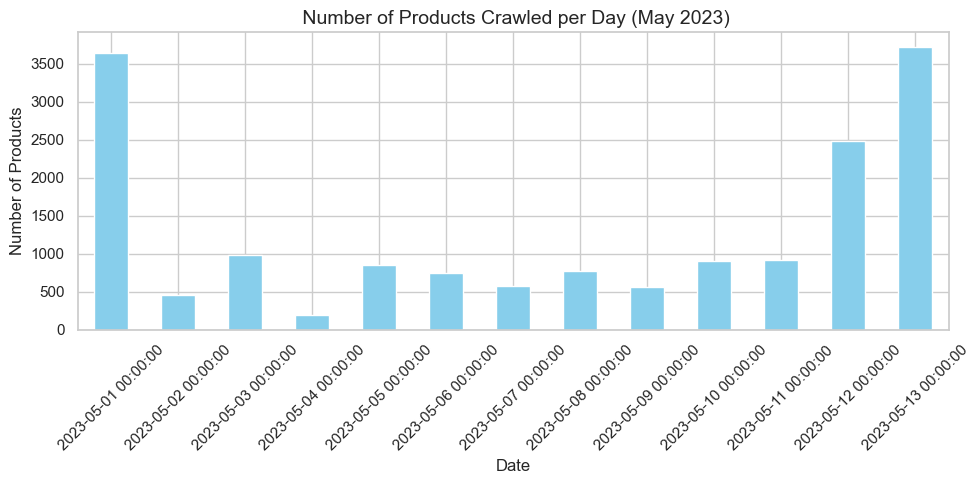

In [24]:

# Set visual style
sns.set(style="whitegrid")

# Plot 1: Products Crawled Per Day
plt.figure(figsize=(10, 5))
products_per_day.plot(kind='bar', color='skyblue')
plt.title(" Number of Products Crawled per Day (May 2023)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Number of Products")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [30]:
plt.savefig("charts/products_per_day.png")  # Save chart to charts/ folder
plt.show()


<Figure size 640x480 with 0 Axes>

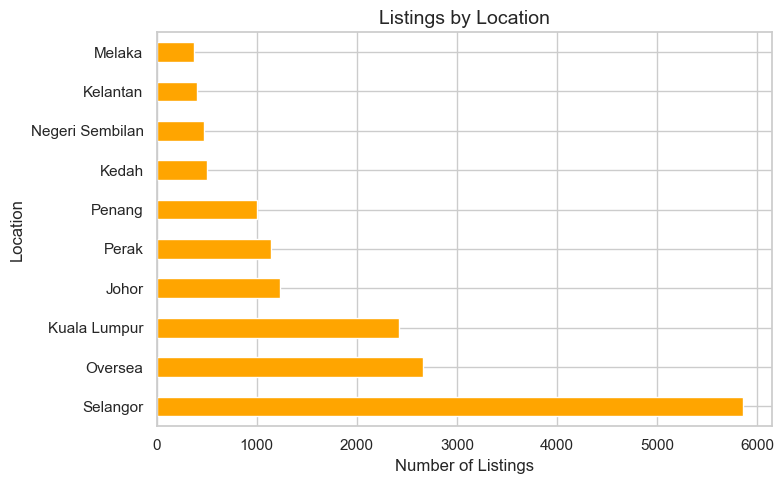

In [26]:
#  Plot 2: Listings by Location
plt.figure(figsize=(8, 5))
location_counts.head(10).plot(kind='barh', color='orange')
plt.title("Listings by Location", fontsize=14)
plt.xlabel("Number of Listings")
plt.ylabel("Location")
plt.tight_layout()
plt.show()

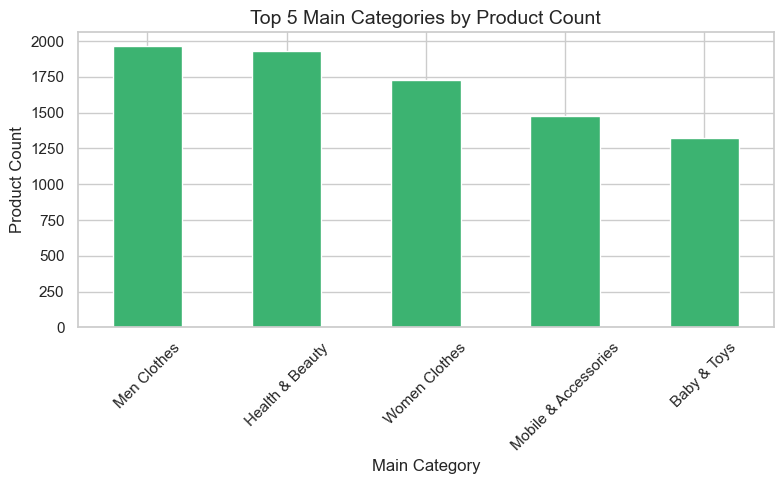

In [27]:
# Plot 3: Top 5 Main Categories by Count
plt.figure(figsize=(8, 5))
main_category_counts.head(5).plot(kind='bar', color='mediumseagreen')
plt.title("Top 5 Main Categories by Product Count", fontsize=14)
plt.xlabel("Main Category")
plt.ylabel("Product Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


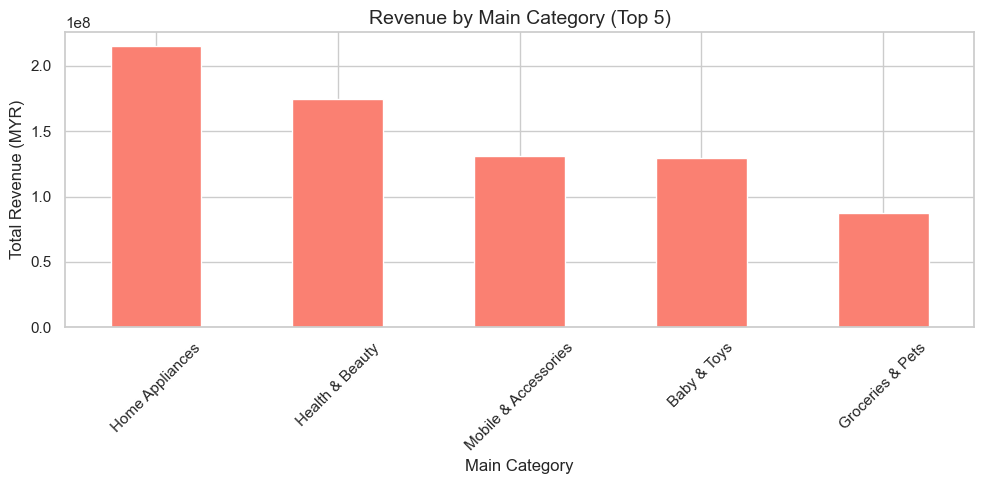

In [28]:
# Plot 4: Revenue by Main Category (Top 5)
plt.figure(figsize=(10, 5))
revenue_by_category.head(5).plot(kind='bar', color='salmon')
plt.title("Revenue by Main Category (Top 5)", fontsize=14)
plt.xlabel("Main Category")
plt.ylabel("Total Revenue (MYR)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()